<a href="https://colab.research.google.com/github/zhenyuefu/ITS/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

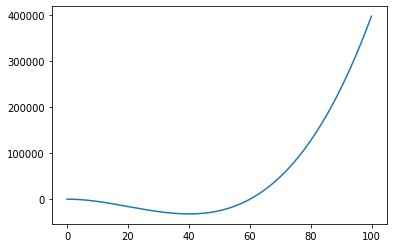

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import math
 
#define aim function
def aimFunction(x):
    y=x**3-60*x**2-4*x+6
    return y
x=[i/10 for i in range(1000)]
y=[0 for i in range(1000)]
for i in range(1000):
    y[i]=aimFunction(x[i])
 
plt.plot(x,y)

In [3]:
T=1000 #initiate temperature
Tmin=10 #minimum value of terperature
x=np.random.uniform(low=0,high=100)#initiate x
k=50 #times of internal circulation 
y=0#initiate result
t=0#time
while T>=Tmin:
    for i in range(k):
        #calculate y
        y=aimFunction(x)
        #generate a new x in the neighboorhood of x by transform function
        xNew=x+np.random.uniform(low=-0.055,high=0.055)*T
        if (0<=xNew and xNew<=100):
            yNew=aimFunction(xNew)
            if yNew-y<0:
                x=xNew
            else:
                #metropolis principle
                p=math.exp(-(yNew-y)/T)
                r=np.random.uniform(low=0,high=1)
                if r<p:
                    x=xNew
    t+=1
    print(t)
    T=1000/(1+t)
    
print(x,aimFunction(x))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
39.82634343243071 -32151.501214414362
